<a href="https://colab.research.google.com/github/MehrdadJalali-AI/InverseLinkPredcition/blob/main/CompareMLMethods_Original.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Mount drive
from google.colab import drive
import os

drive.mount('/content/drive')
# Change working path
os.chdir('/content/drive/MyDrive/Research/MOF/InverseLinkPredcition')

Mounted at /content/drive


In [3]:
!pip install rdkit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.9/34.9 MB 66.0 MB/s eta 0:00:00


Unique node labels: 12561
Filtered summary data: 12561


/tmp/ipython-input-5-2878327143.py:265: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  summary_data_filtered.loc[:, 'PLD_category'] = pd.cut(


Epoch 1/40
249/252 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4717 - loss: 3.6183
Epoch 1: val_loss improved from inf to 1.20695, saving model to best_gcn_model.keras
252/252 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - accuracy: 0.4731 - loss: 3.5979 - val_accuracy: 0.6836 - val_loss: 1.2070
Epoch 2/40
249/252 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6819 - loss: 1.1758
Epoch 2: val_loss improved from 1.20695 to 0.93488, saving model to best_gcn_model.keras
252/252 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.6819 - loss: 1.1747 - val_accuracy: 0.7144 - val_loss: 0.9349
Epoch 3/40
249/252 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6766 - loss: 0.9685
Epoch 3: val_loss improved from 0.93488 to 0.81972, saving model to best_gcn_model.keras
252/252 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.6767 - loss: 0.9678 - val_accuracy: 0.7199 - val_loss: 0.8197
Epoch 4/40
251/252 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6880 - loss: 0.8699
Epoch 4: val_loss improved from 0.8

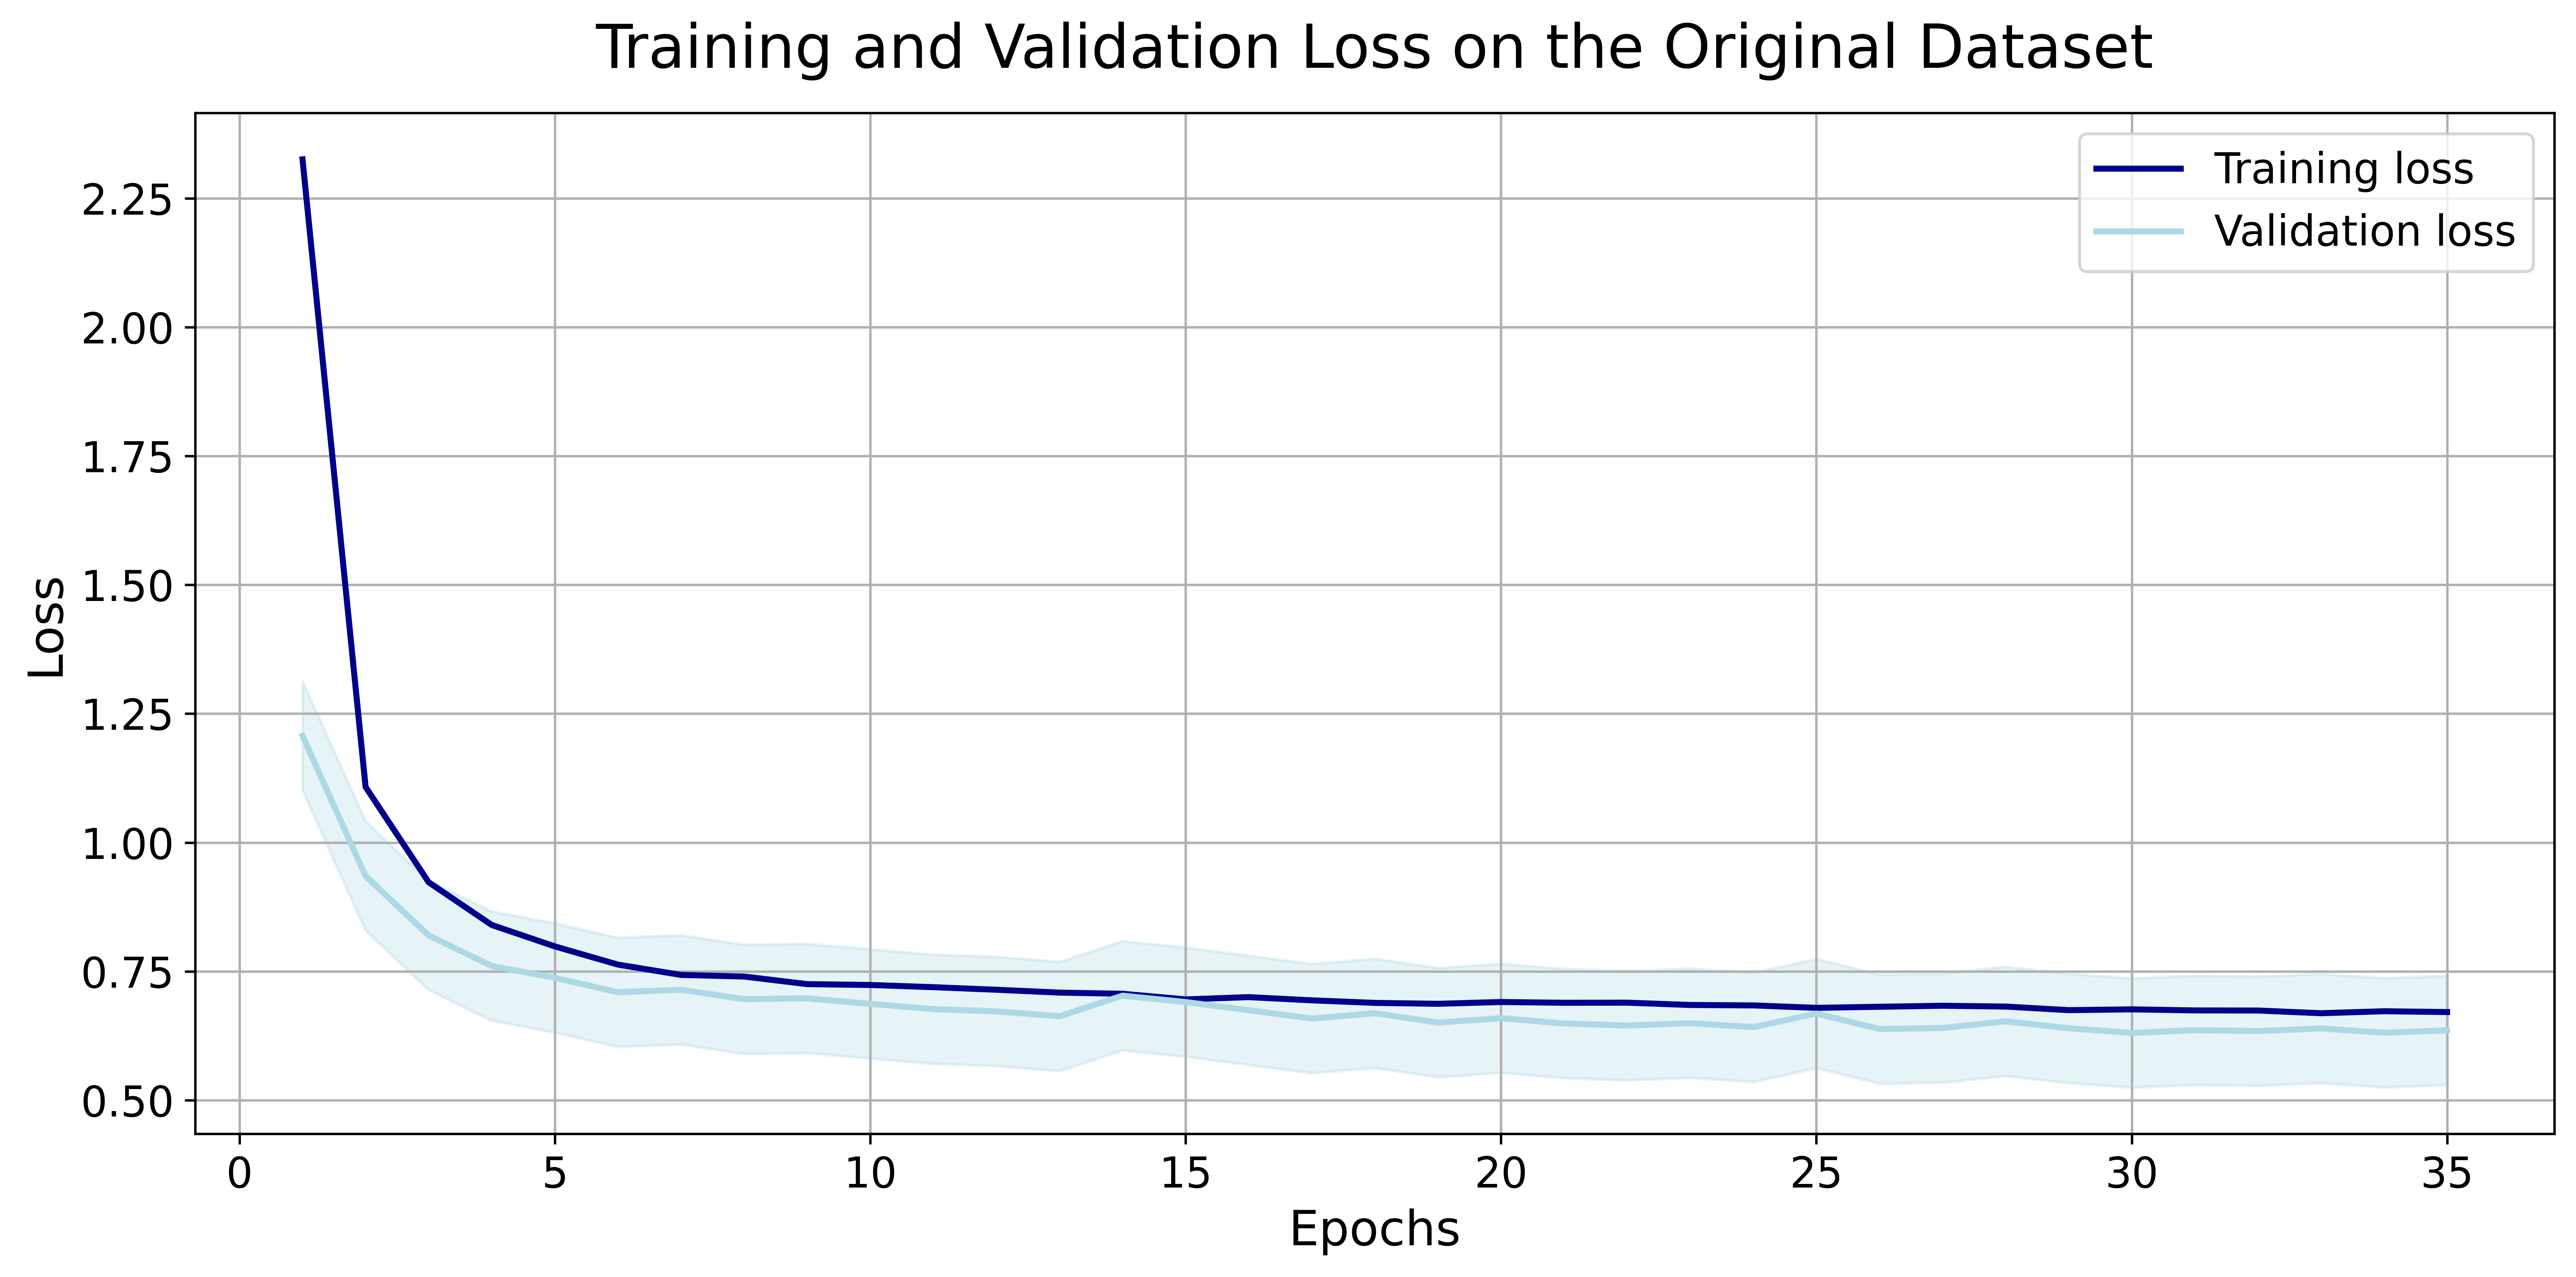

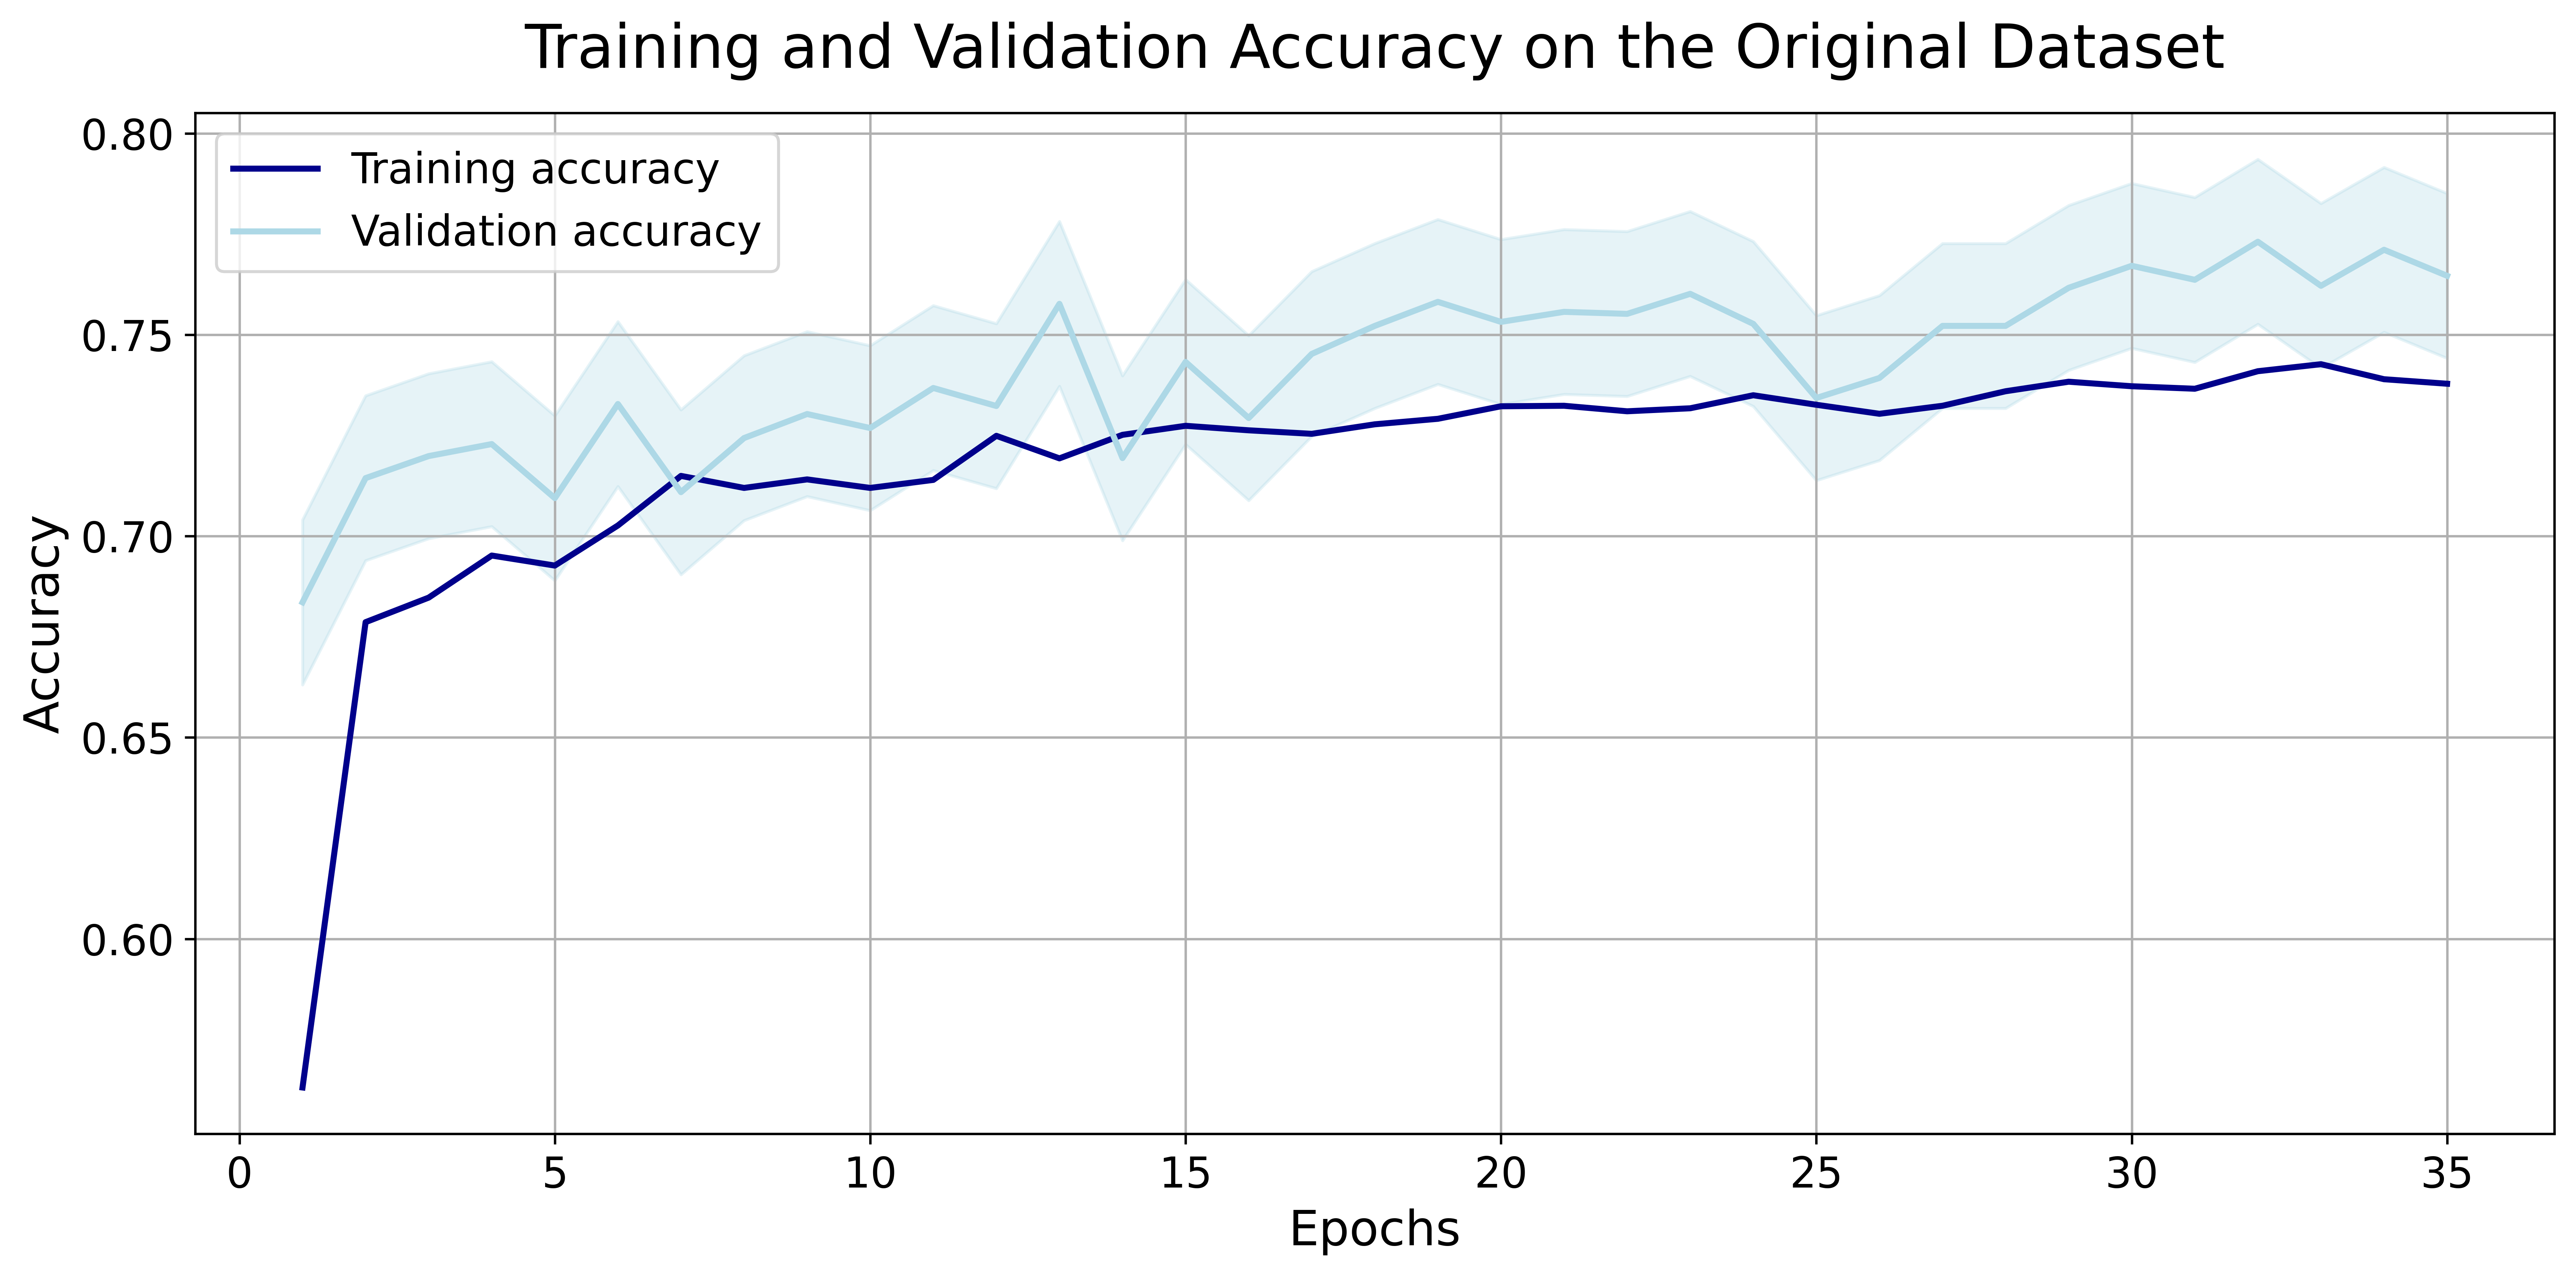

Test Accuracy: 0.7508953213691711
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


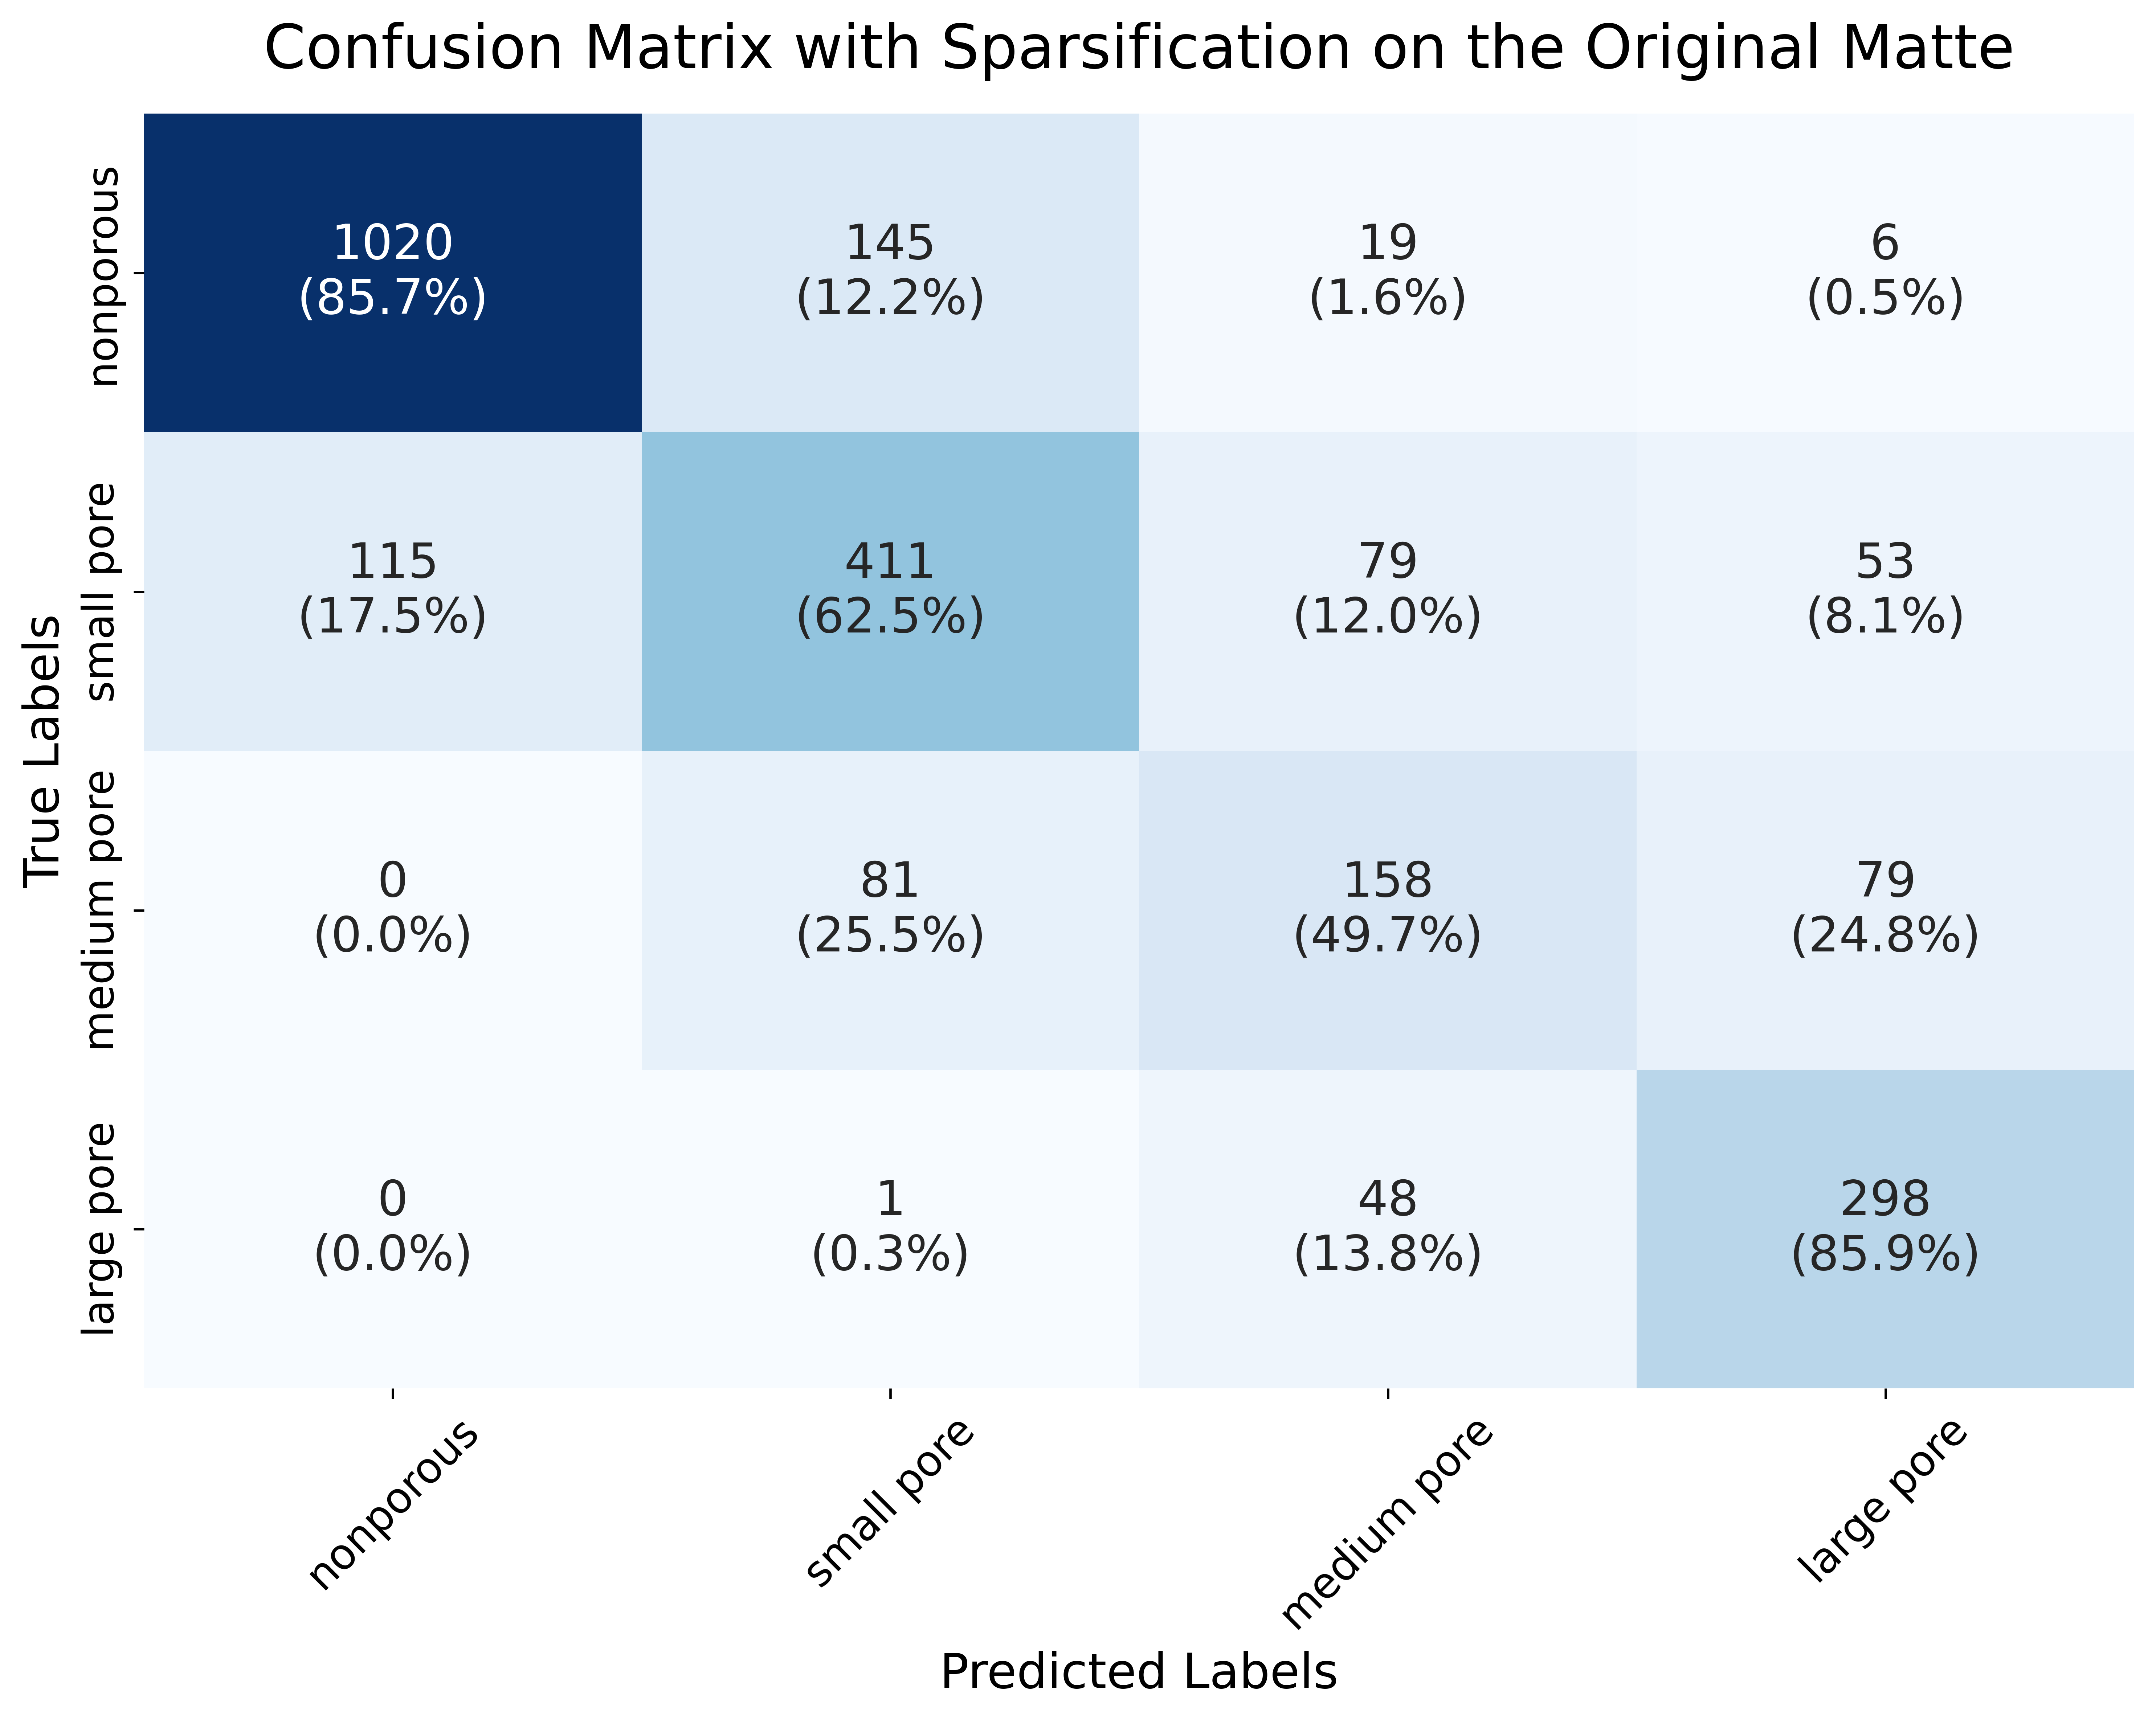

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Epoch 1/20
252/252 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4781 - loss: 1.9699 - val_accuracy: 0.6786 - val_loss: 0.9954
Epoch 2/20
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6670 - loss: 0.9599 - val_accuracy: 0.7025 - val_loss: 0.8241
Epoch 3/20
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6853 - loss: 0.8536 - val_accuracy: 0.7199 - val_loss: 0.7623
Epoch 4/20
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6946 - loss: 0.8038 - val_accuracy: 0.7194 - val_loss: 0.7442
Epoch 5/20
252/252 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7080 - loss: 0.7608 - val_accuracy: 0.7259 - val_loss: 0.7115
Epoch 6/20
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7031 - loss: 0.7450 - val_accuracy: 0.7259 - val_loss: 0.6993
Epoch 7/20
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7134 - loss: 0.7271 - val_accuracy: 0.7303 - val_loss: 0.6946
Epoch 8/20
252/252 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7239 - loss: 0.7123 - val_accuracy: 0.

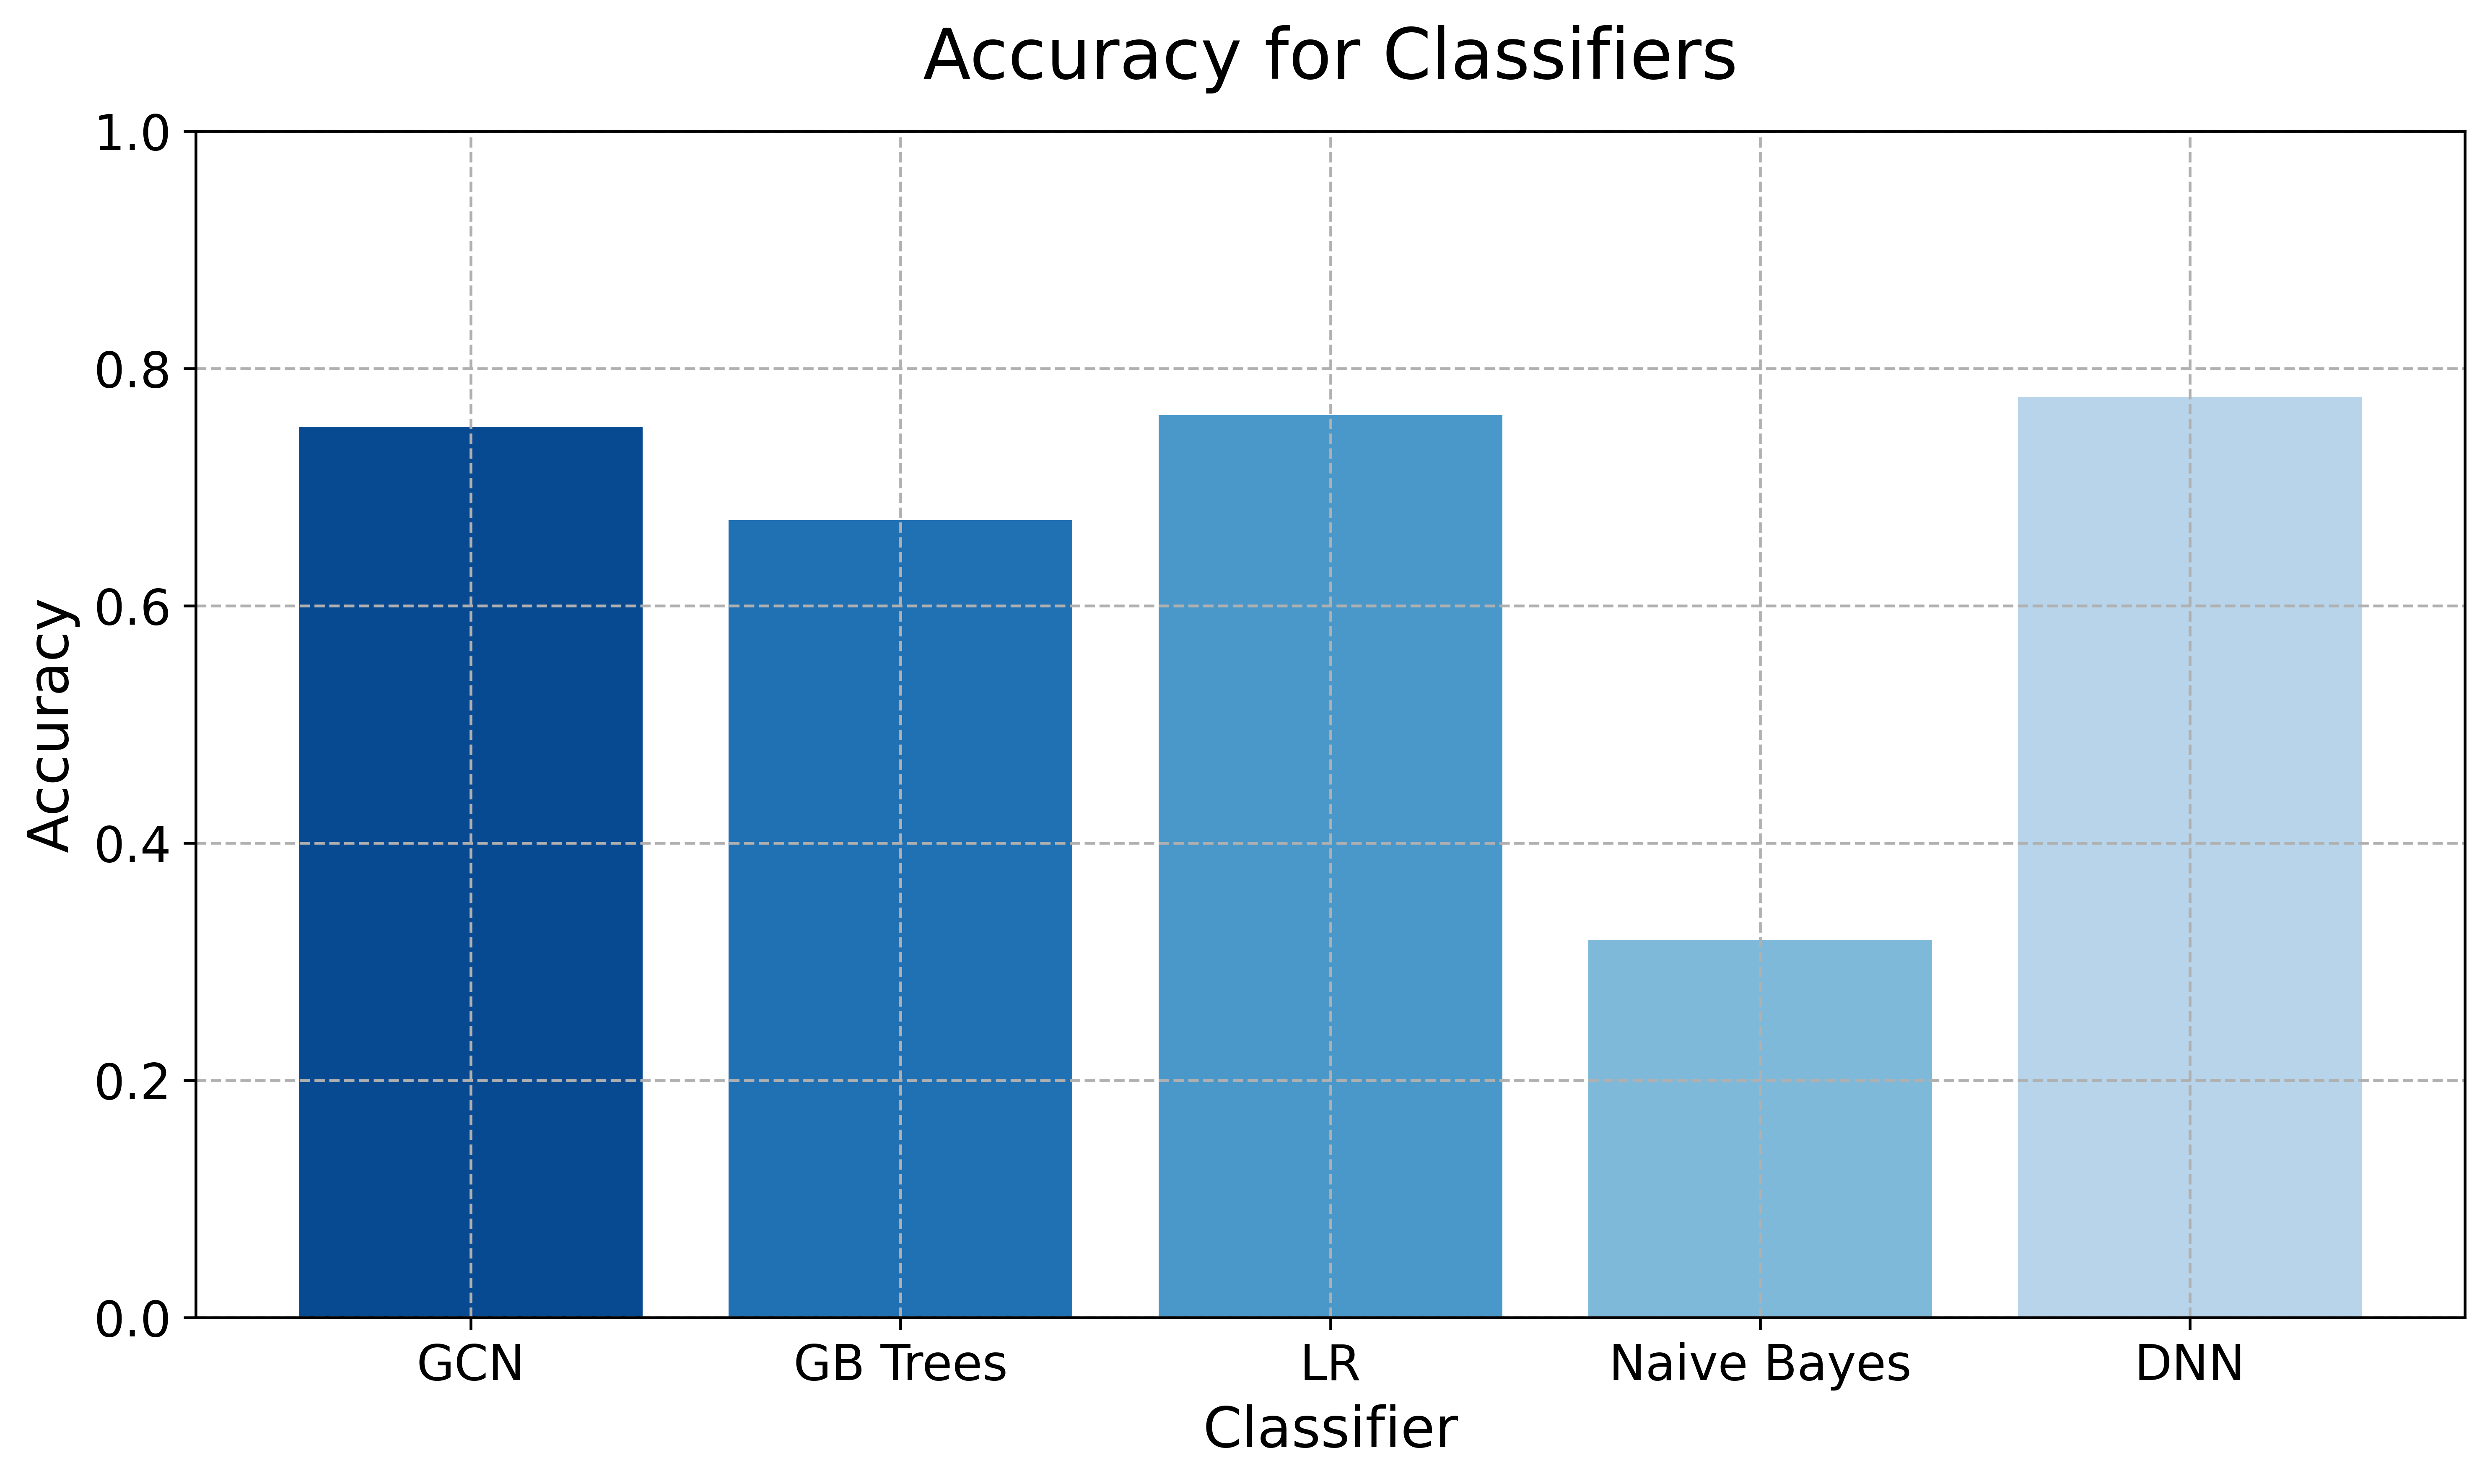

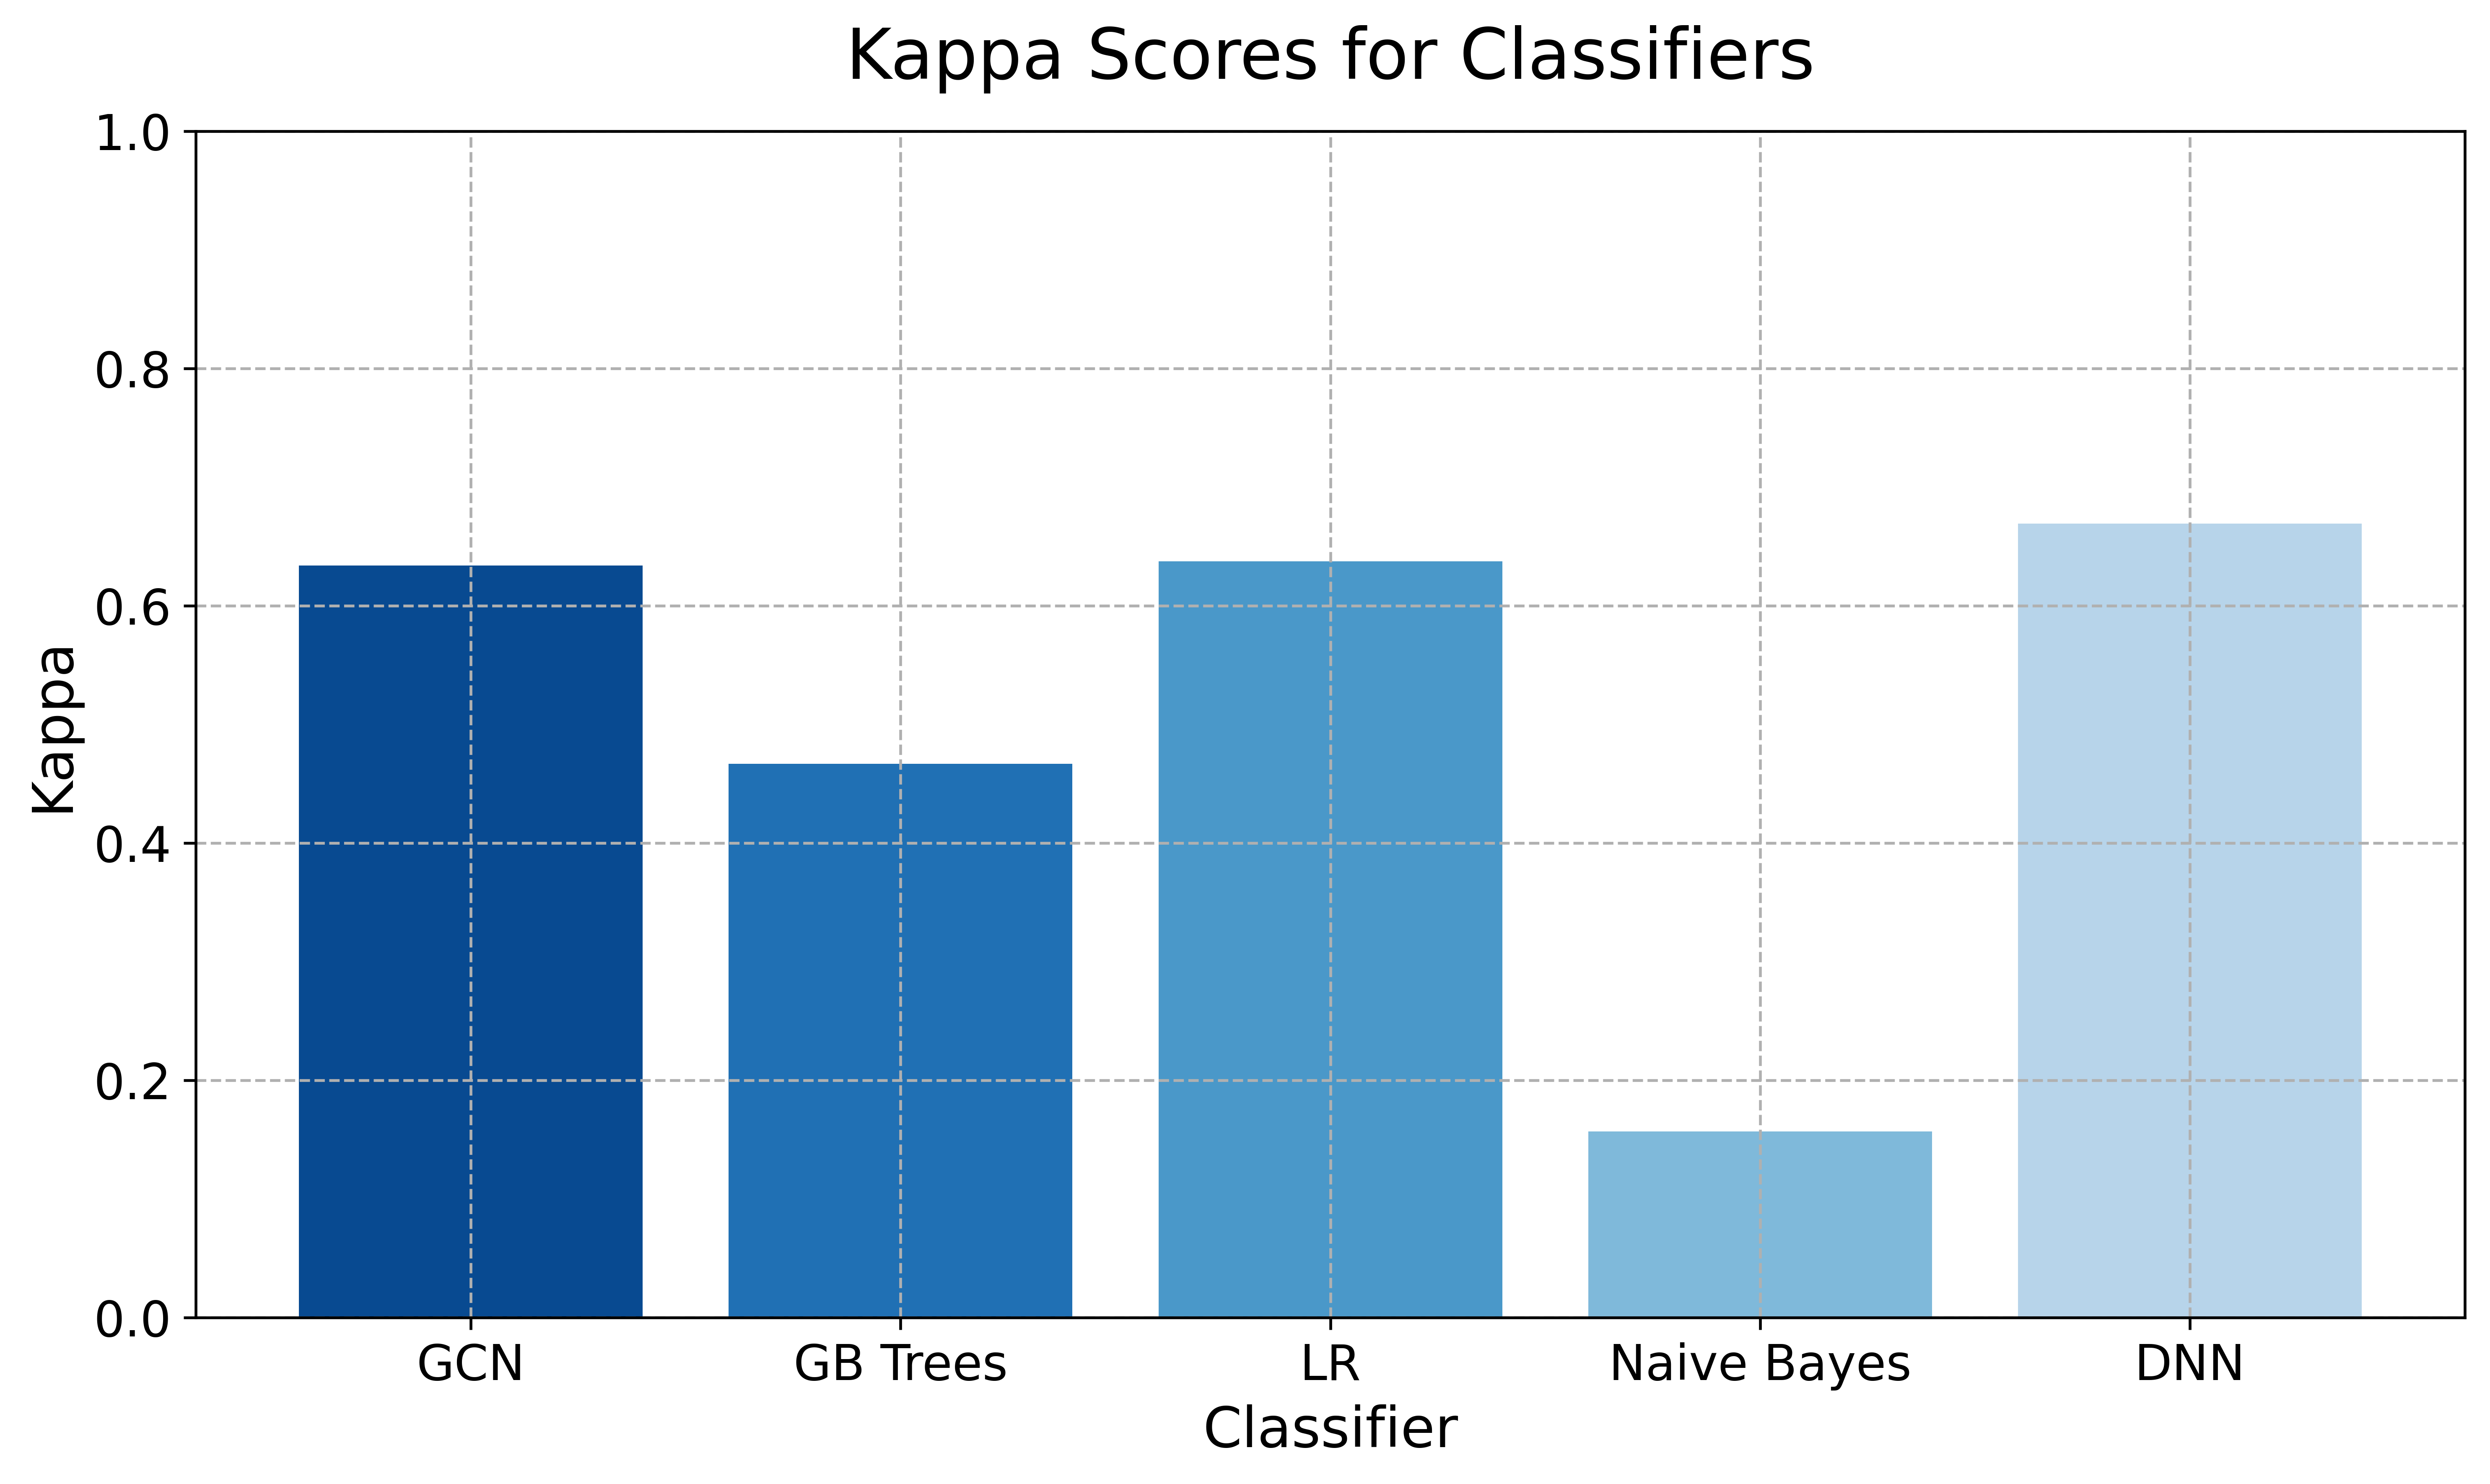

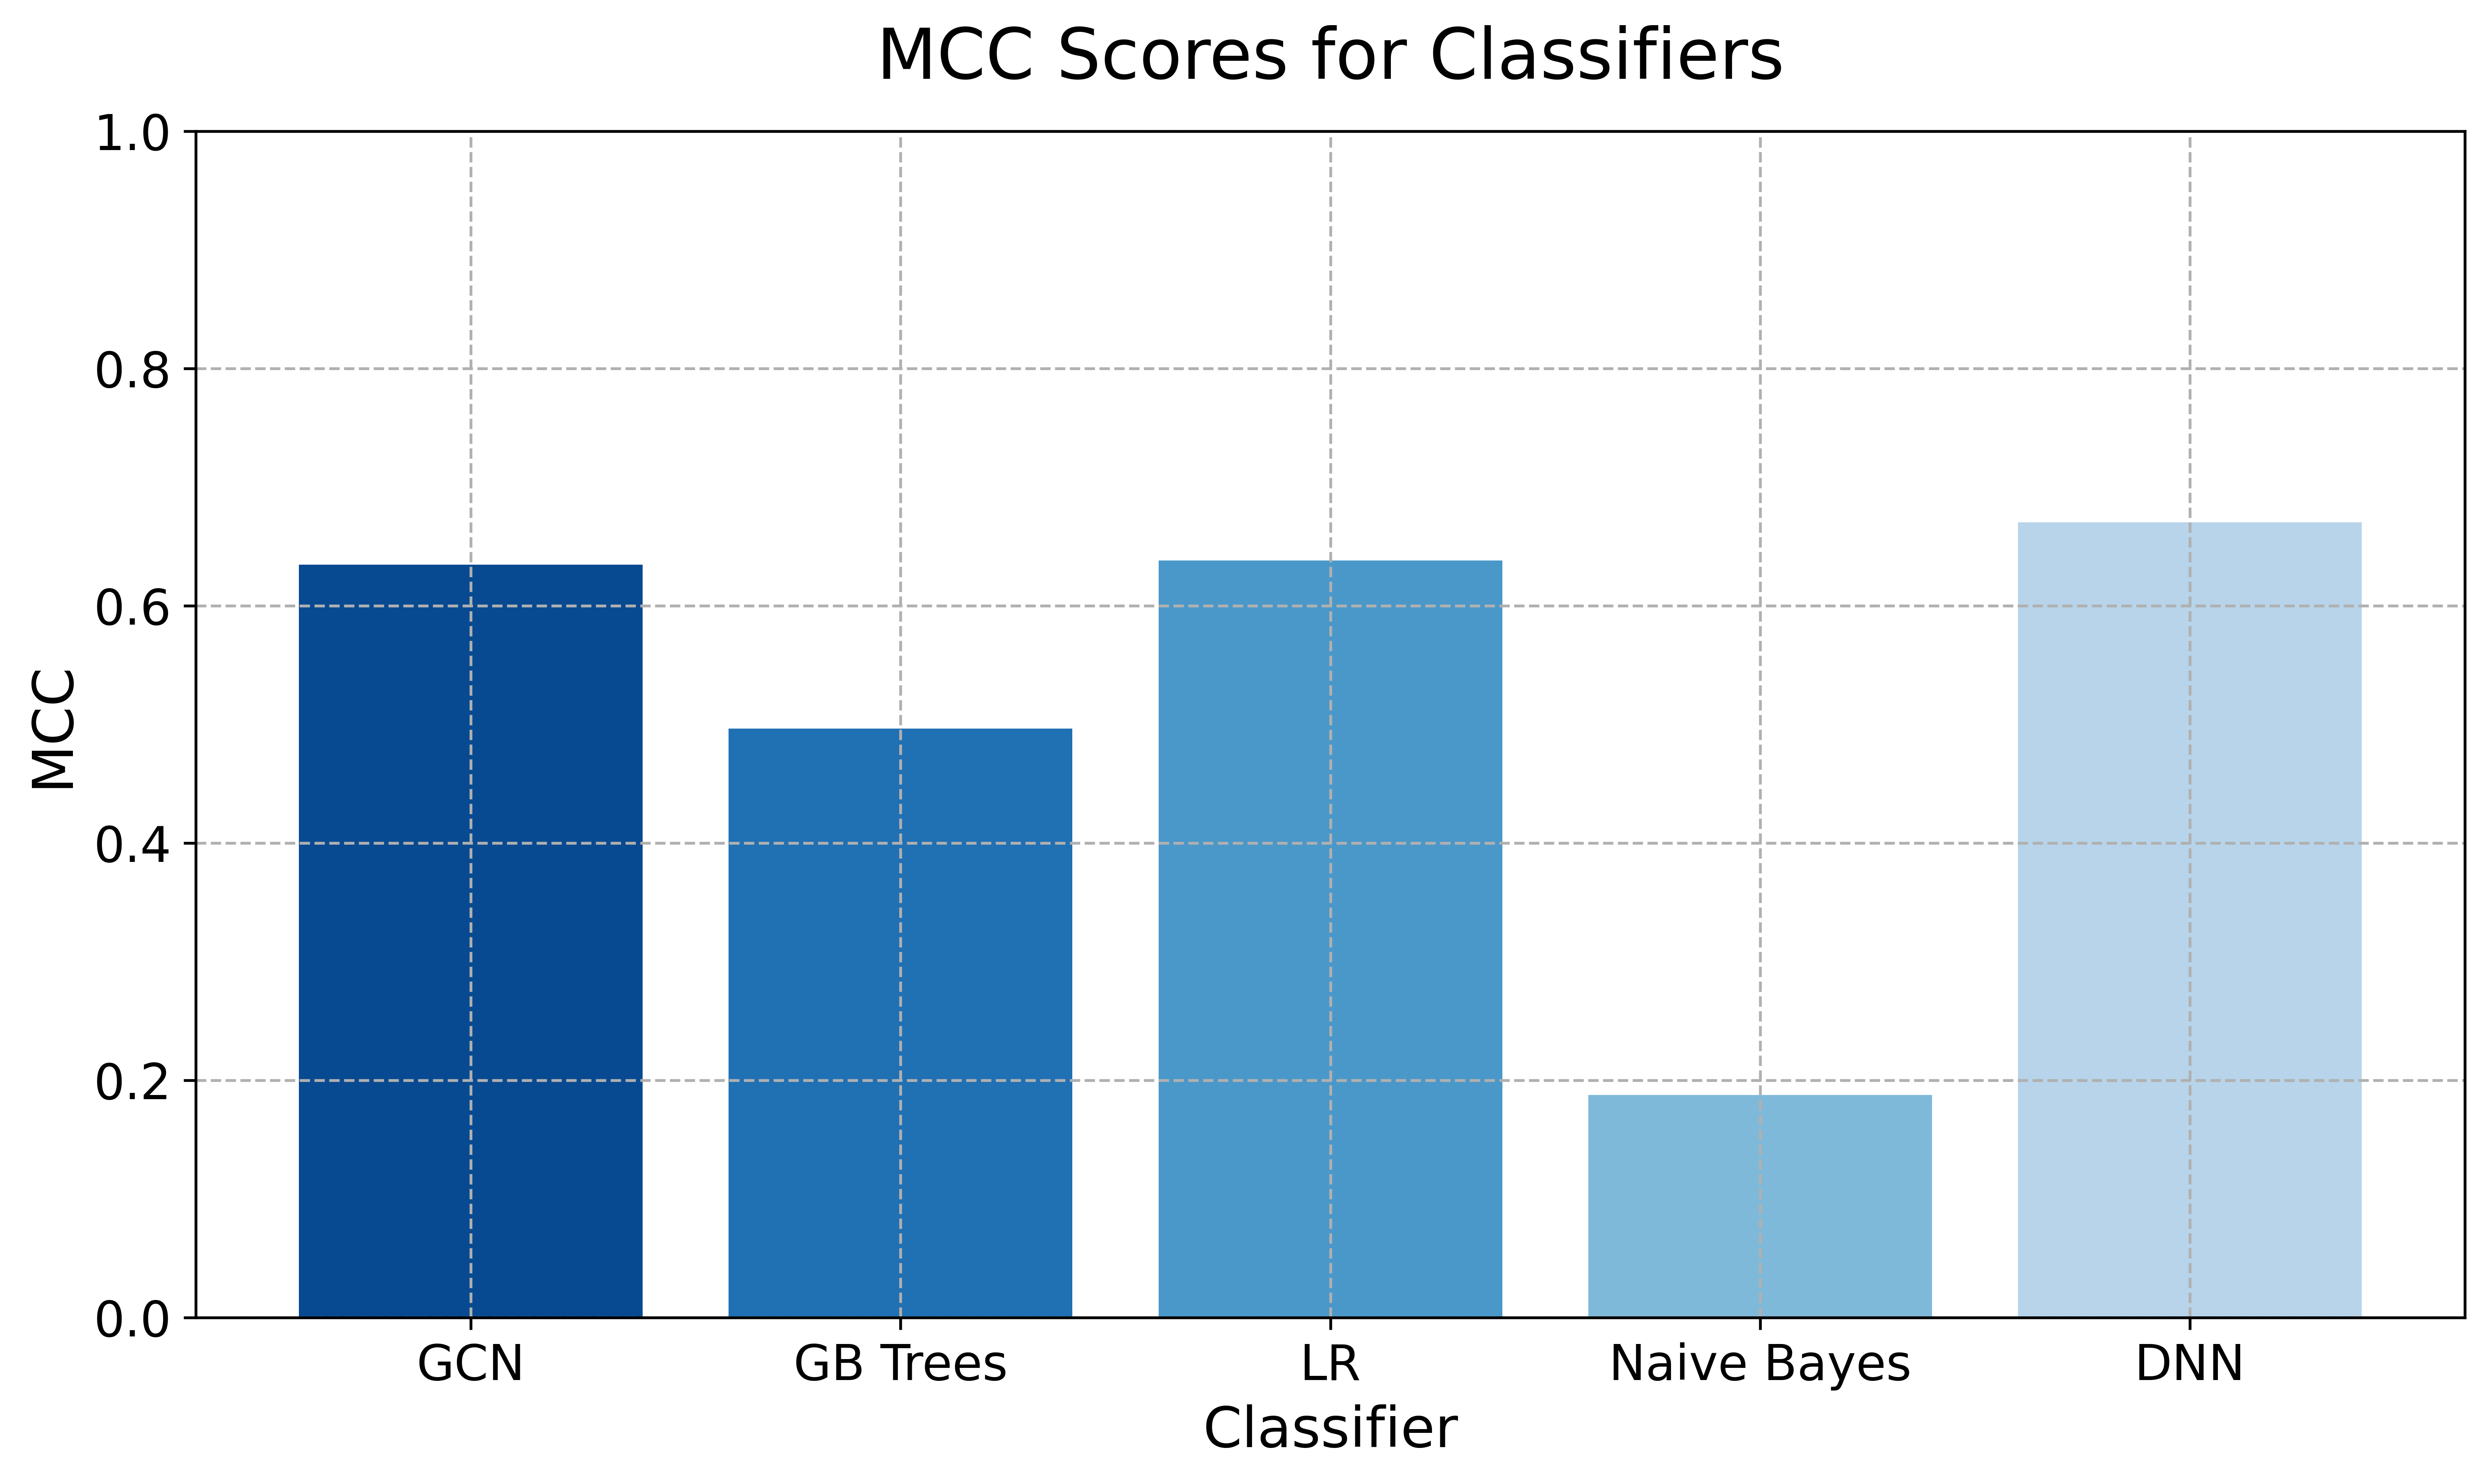

In [5]:
import pandas as pd
import numpy as np
import networkx as nx
from rdkit import Chem
from rdkit.Chem import AllChem
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Input, Dense, Dropout, concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import CategoricalCrossentropy
import matplotlib.pyplot as plt
from statsmodels.stats.contingency_tables import mcnemar
from sklearn.metrics import confusion_matrix, cohen_kappa_score, matthews_corrcoef, roc_auc_score
import seaborn as sns
import random
import tensorflow as tf
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from tensorflow.keras.models import load_model
import warnings
from rdkit import RDLogger
from tensorflow.keras import models, layers, regularizers
from sklearn.metrics import accuracy_score
import time
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint  # Added ModelCheckpoint import

threshold = 0

# Suppress specific deprecation warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Suppress RDKit warnings globally
RDLogger.DisableLog('rdApp.*')

def generate_fingerprint(smiles):
    """Generates a molecular fingerprint given a SMILES string."""
    try:
        mol = Chem.MolFromSmiles(smiles)
        if mol is None:
            return np.zeros((1024,), dtype=float)  # Return an array of zeros if molecule can't be parsed
        return np.array(AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=1024), dtype=float)
    except Exception as e:
        print(f"SMILES Parse Error: {e}")
        return np.zeros((1024,), dtype=float)  # Return an array of zeros in case of an error

def plot_confusion_matrix(y_true, y_pred, classes):
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Calculate percentage accuracy for each element in the confusion matrix
    cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

    # Combine counts and percentages for display
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_percentage[i, j]
            annot[i, j] = f'{c}\n({p:.1f}%)'  # Count and percentage

    # Plot the confusion matrix with annotations
    plt.figure(figsize=(10, 8), dpi=600)  # Increased figure size and set DPI
    sns.heatmap(cm, annot=annot, fmt='', cmap='Blues', xticklabels=classes, yticklabels=classes, cbar=False,
                annot_kws={"size": 16})  # Larger annotation font size
    plt.title('Confusion Matrix with Sparsification on the Original Matte', fontsize=20, pad=15)
    plt.xlabel('Predicted Labels', fontsize=16)
    plt.ylabel('True Labels', fontsize=16)
    plt.xticks(fontsize=14, rotation=45)
    plt.yticks(fontsize=14)
    plt.tight_layout()
    plt.savefig('confusion_matrix.jpg', format='jpg', dpi=600, bbox_inches='tight')
    plt.show()
    plt.close()

def plot_loss_accuracy(history):
    # Extract loss and accuracy from history
    loss = history.history['loss']
    val_loss = history.history.get('val_loss', None)
    accuracy = history.history['accuracy']
    val_accuracy = history.history.get('val_accuracy', None)
    epochs = range(1, len(loss) + 1)

    # Plot loss
    plt.figure(figsize=(12, 6), dpi=600)  # Increased figure size and set DPI
    plt.plot(epochs, loss, 'darkblue', label='Training loss', linewidth=2)
    if val_loss:
        plt.plot(epochs, val_loss, 'lightblue', label='Validation loss', linewidth=2)
        plt.fill_between(epochs, np.array(val_loss) - np.std(val_loss), np.array(val_loss) + np.std(val_loss),
                         color='lightblue', alpha=0.3)
    plt.title('Training and Validation Loss on the Original Dataset', fontsize=20, pad=15)
    plt.xlabel('Epochs', fontsize=16)
    plt.ylabel('Loss', fontsize=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.legend(fontsize=14)
    plt.grid(True)
    plt.tight_layout()
    plt.savefig('loss_plot.jpg', format='jpg', dpi=600, bbox_inches='tight')
    plt.show()
    plt.close()

    # Plot accuracy
    plt.figure(figsize=(12, 6), dpi=600)  # Increased figure size and set DPI
    plt.plot(epochs, accuracy, 'darkblue', label='Training accuracy', linewidth=2)
    if val_accuracy:
        plt.plot(epochs, val_accuracy, 'lightblue', label='Validation accuracy', linewidth=2)
        plt.fill_between(epochs, np.array(val_accuracy) - np.std(val_accuracy), np.array(val_accuracy) + np.std(val_accuracy),
                         color='lightblue', alpha=0.3)
    plt.title('Training and Validation Accuracy on the Original Dataset', fontsize=20, pad=15)
    plt.xlabel('Epochs', fontsize=16)
    plt.ylabel('Accuracy', fontsize=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.legend(fontsize=14)
    plt.grid(True)
    plt.tight_layout()
    plt.savefig('accuracy_plot.jpg', format='jpg', dpi=600, bbox_inches='tight')
    plt.show()
    plt.close()

def label_encode_metal_names(metal_names):
    """Encodes metal names as integers."""
    metal_dict = {metal: idx for idx, metal in enumerate(np.unique(metal_names))}
    return np.array([metal_dict[metal] for metal in metal_names])

def train_and_evaluate_classifier(classifier, train_features, train_labels, test_features, test_labels):
    classifier.fit(train_features, train_labels)
    accuracy = classifier.score(test_features, test_labels)
    return accuracy

def preprocess_graph(graph, features):
    # Determine the dimensionality of the feature vectors
    feature_dimension = features.shape[1]

    # Convert the graph to an adjacency matrix
    adjacency_matrix = nx.adjacency_matrix(graph).toarray()

    # Initialize an empty list to store feature vectors
    feature_vectors = []

    # Create a mapping from node labels to integer indices
    node_to_index = {node: index for index, node in enumerate(graph.nodes())}

    # Iterate over nodes in the graph
    for node in graph.nodes():
        # Get the integer index corresponding to the node label
        node_index = node_to_index[node]
        # Check if the node index is valid
        if node_index < len(features):
            # Append the feature vector corresponding to the node index
            feature_vectors.append(features[node_index])
        else:
            # If the node index is out of range, assign a default feature vector
            feature_vectors.append(np.zeros((feature_dimension,)))

    # Convert the list of feature vectors to a numpy array
    feature_matrix = np.array(feature_vectors)

    return adjacency_matrix, feature_matrix

def build_gcn_model(input_shape_feature, input_shape_adjacency, num_classes):
    # Define input layers
    x_inp_feature = Input(shape=(input_shape_feature,))
    x_inp_adjacency = Input(shape=(input_shape_adjacency,))

    # Feature processing with multiple layers
    x_feature = Dense(128, activation='relu', kernel_regularizer=l2(0.01))(x_inp_feature)
    x_feature = Dropout(0.5)(x_feature)
    x_feature = Dense(64, activation='relu', kernel_regularizer=l2(0.01))(x_feature)
    x_feature = Dropout(0.3)(x_feature)

    # Adjacency processing with multiple layers
    x_adjacency = Dense(128, activation='relu', kernel_regularizer=l2(0.01))(x_inp_adjacency)
    x_adjacency = Dropout(0.5)(x_adjacency)
    x_adjacency = Dense(64, activation='relu', kernel_regularizer=l2(0.01))(x_adjacency)
    x_adjacency = Dropout(0.3)(x_adjacency)

    # Concatenate feature and adjacency outputs
    x = concatenate([x_feature, x_adjacency])

    # Output layer
    output = Dense(num_classes, activation='softmax')(x)

    # Create model
    model = Model(inputs=[x_inp_feature, x_inp_adjacency], outputs=output)

    # Using a smaller learning rate
    optimizer = Adam(learning_rate=0.0009)

    # Compile model
    model.compile(optimizer=optimizer, loss=CategoricalCrossentropy(), metrics=['accuracy'])

    return model

def build_feedforward_model(input_shape, num_classes):
    model = models.Sequential([
        layers.Input(shape=(input_shape,)),
        layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
        layers.Dropout(0.5),
        layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
        layers.Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

def train_gcn_model(model, adjacency_matrix, feature_matrix, labels, epochs, batch_size):
    if model is not None and adjacency_matrix is not None and feature_matrix is not None and labels is not None:
        # Early stopping to prevent overfitting
        early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

        # ModelCheckpoint to save the best model
        model_checkpoint = ModelCheckpoint('best_gcn_model.keras', monitor='val_loss', save_best_only=True, verbose=1)

        start_time = time.time()
        # Train the model
        history = model.fit([feature_matrix, adjacency_matrix], labels,
                            epochs=epochs, batch_size=batch_size,
                            validation_split=0.2, callbacks=[early_stopping, model_checkpoint])
        end_time = time.time()

        # Calculate total training time
        total_training_time = end_time - start_time
        print(f"Total training time: {total_training_time:.2f} seconds")

        return history
    else:
        print("Error: One or more input arguments to train_gcn_model is None.")

if __name__ == "__main__":
    edges_list_filename = 'edges_list_0.8_Full.csv'
    summary_data_filename = '1M1L3D_summary.csv'

    # Load data
    edges_list = pd.read_csv(edges_list_filename, header=None, names=['source', 'target', 'weight'], delimiter=' ')
    summary_data = pd.read_csv(summary_data_filename)

    node_labels_source = edges_list['source'].astype(str).unique()
    node_labels_target = edges_list['target'].astype(str).unique()
    node_labels = np.unique(np.concatenate((node_labels_source, node_labels_target)))
    node_labels = list(set(node_labels))

    print("Unique node labels:", len(node_labels))

    summary_data_filtered = summary_data[summary_data['refcode'].isin(node_labels)]
    print("Filtered summary data:", len(summary_data_filtered))

    if not summary_data_filtered.empty:
        linker_smiles = summary_data_filtered['linker SMILES']
        if not linker_smiles.empty:
            # Generate features
            linker_features = np.stack(linker_smiles.dropna().apply(generate_fingerprint).values)
            metal_names = summary_data_filtered['metal']
            metal_features = label_encode_metal_names(metal_names).reshape(-1, 1)
            other_features = summary_data_filtered[['Largest Cavity Diameter', 'Largest Free Sphere']].values.astype('float32')
            features = np.concatenate((linker_features, metal_features, other_features), axis=1)

            # Generate labels
            summary_data_filtered.loc[:, 'PLD_category'] = pd.cut(
                summary_data_filtered['Pore Limiting Diameter'],
                bins=[-np.inf, 2.4, 4.4, 5.9, np.inf],
                labels=['nonporous', 'small pore', 'medium pore', 'large pore']
            )
            labels = pd.get_dummies(summary_data_filtered['PLD_category']).values

            # Split the data into training and testing sets
            X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=56)

            # Load the sparsified graph
            graph = nx.read_weighted_edgelist(edges_list_filename)

            # Preprocess the graph data
            adjacency_matrix, feature_matrix = preprocess_graph(graph, features)

            # Split the adjacency and feature matrices accordingly
            adj_train, adj_test, feat_train, feat_test = train_test_split(adjacency_matrix, feature_matrix, test_size=0.2, random_state=56)

            # Provide the number of classes
            num_classes = labels.shape[1]

            # Build the GCN model
            gcn_model = build_gcn_model(feat_train.shape[1], adj_train.shape[1], num_classes)

            # Train the GCN model
            history = train_gcn_model(gcn_model, adj_train, feat_train, y_train, epochs=40, batch_size=32)
            plot_loss_accuracy(history)

            # Save the trained GCN model
            gcn_model.save("gcn_model_original.h5")
            # Save the adjacency matrix
            np.save("adjacency_matrix_original.npy", adjacency_matrix)

            # Evaluate the model on the test set
            test_loss, test_accuracy = gcn_model.evaluate([feat_test, adj_test], y_test, verbose=0)
            print(f'Test Accuracy: {test_accuracy}')

            # Generate predictions on the test set
            y_pred = np.argmax(gcn_model.predict([feat_test, adj_test]), axis=1)
            y_true = np.argmax(y_test, axis=1)

            # Define class labels
            classes = ['nonporous', 'small pore', 'medium pore', 'large pore']

            # Plot confusion matrix for the test set
            plot_confusion_matrix(y_true, y_pred, classes)

            # Train and evaluate GCN
            y_pred_gcn = np.argmax(gcn_model.predict([feat_test, adj_test]), axis=1)
            y_true_gcn = np.argmax(y_test, axis=1)
            gcn_accuracy = accuracy_score(y_true_gcn, y_pred_gcn)
            gcn_kappa = cohen_kappa_score(y_true_gcn, y_pred_gcn)
            gcn_mcc = matthews_corrcoef(y_true_gcn, y_pred_gcn)

            train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.2, random_state=42)

            # Train and evaluate Gradient Boosted Trees
            gbt_classifier = GradientBoostingClassifier(n_estimators=50, learning_rate=0.01, max_depth=2)
            gbt_classifier.fit(train_features, np.argmax(train_labels, axis=1))
            gbt_pred = gbt_classifier.predict(test_features)
            gbt_accuracy = accuracy_score(np.argmax(test_labels, axis=1), gbt_pred)
            gbt_kappa = cohen_kappa_score(np.argmax(test_labels, axis=1), gbt_pred)
            gbt_mcc = matthews_corrcoef(np.argmax(test_labels, axis=1), gbt_pred)

            # Train and evaluate Logistic Regression
            from sklearn.linear_model import LogisticRegression
            logreg_classifier = LogisticRegression(max_iter=200)
            logreg_classifier.fit(train_features, np.argmax(train_labels, axis=1))
            logreg_pred = logreg_classifier.predict(test_features)
            logreg_accuracy = accuracy_score(np.argmax(test_labels, axis=1), logreg_pred)
            logreg_kappa = cohen_kappa_score(np.argmax(test_labels, axis=1), logreg_pred)
            logreg_mcc = matthews_corrcoef(np.argmax(test_labels, axis=1), logreg_pred)

            # Train and evaluate Naive Bayes
            nb_classifier = GaussianNB()
            nb_classifier.fit(train_features, np.argmax(train_labels, axis=1))
            nb_pred = nb_classifier.predict(test_features)
            nb_accuracy = accuracy_score(np.argmax(test_labels, axis=1), nb_pred)
            nb_kappa = cohen_kappa_score(np.argmax(test_labels, axis=1), nb_pred)
            nb_mcc = matthews_corrcoef(np.argmax(test_labels, axis=1), nb_pred)

            # Train and evaluate Feedforward Neural Network (DNN)
            feedforward_model = build_feedforward_model(train_features.shape[1], train_labels.shape[1])
            feedforward_model.fit(train_features, train_labels, epochs=20, batch_size=32, validation_split=0.2)
            feedforward_loss, feedforward_accuracy = feedforward_model.evaluate(test_features, test_labels)
            feedforward_predictions = np.argmax(feedforward_model.predict(test_features), axis=1)
            true_labels = np.argmax(test_labels, axis=1)
            dnn_kappa = cohen_kappa_score(true_labels, feedforward_predictions)
            dnn_mcc = matthews_corrcoef(true_labels, feedforward_predictions)

            # Define classifiers and evaluation metrics
            classifiers = ['GCN', 'GB Trees', 'LR', 'Naive Bayes', 'DNN']
            accuracies = [gcn_accuracy, gbt_accuracy, logreg_accuracy, nb_accuracy, feedforward_accuracy]
            kappa_scores = [gcn_kappa, gbt_kappa, logreg_kappa, nb_kappa, dnn_kappa]
            mcc_scores = [gcn_mcc, gbt_mcc, logreg_mcc, nb_mcc, dnn_mcc]

            # Print evaluation metrics
            print("Classifier Evaluation Metrics:")
            for clf, acc, kappa, mcc in zip(classifiers, accuracies, kappa_scores, mcc_scores):
                print(f"{clf}: Accuracy={acc:.3f}, Kappa={kappa:.3f}, MCC={mcc:.3f}")

            # Plot all metrics in the same style
            colors = plt.cm.Blues(np.linspace(0.9, 0.3, len(classifiers)))

            # Plot accuracy
            plt.figure(figsize=(10, 6), dpi=600)  # Increased figure size and set DPI
            plt.bar(classifiers, accuracies, color=colors)
            plt.title('Accuracy for Classifiers', fontsize=20, pad=15)
            plt.xlabel('Classifier', fontsize=16)
            plt.ylabel('Accuracy', fontsize=16)
            plt.ylim(0, 1)  # Start from 0, no negative values
            plt.xticks(fontsize=14)
            plt.yticks(fontsize=14)
            plt.grid(True, which="both", ls="--")
            plt.tight_layout()
            plt.savefig('accuracy_classifiers.jpg', format='jpg', dpi=600, bbox_inches='tight')
            plt.show()
            plt.close()

            # Plot kappa scores
            plt.figure(figsize=(10, 6), dpi=600)  # Increased figure size and set DPI
            plt.bar(classifiers, kappa_scores, color=colors)
            plt.title('Kappa Scores for Classifiers', fontsize=20, pad=15)
            plt.xlabel('Classifier', fontsize=16)
            plt.ylabel('Kappa', fontsize=16)
            plt.ylim(0, 1)  # Start from 0
            plt.xticks(fontsize=14)
            plt.yticks(fontsize=14)
            plt.grid(True, which="both", ls="--")
            plt.tight_layout()
            plt.savefig('kappa_classifiers.jpg', format='jpg', dpi=600, bbox_inches='tight')
            plt.show()
            plt.close()

            # Plot MCC scores
            plt.figure(figsize=(10, 6), dpi=600)  # Increased figure size and set DPI
            plt.bar(classifiers, mcc_scores, color=colors)
            plt.title('MCC Scores for Classifiers', fontsize=20, pad=15)
            plt.xlabel('Classifier', fontsize=16)
            plt.ylabel('MCC', fontsize=16)
            plt.ylim(0, 1)  # Start from 0
            plt.xticks(fontsize=14)
            plt.yticks(fontsize=14)
            plt.grid(True, which="both", ls="--")
            plt.tight_layout()
            plt.savefig('mcc_classifiers.jpg', format='jpg', dpi=600, bbox_inches='tight')
            plt.show()
            plt.close()
        else:
            print("Error: linker_smiles column is empty.")
    else:
        print("Error: summary_data_filtered DataFrame is empty.")

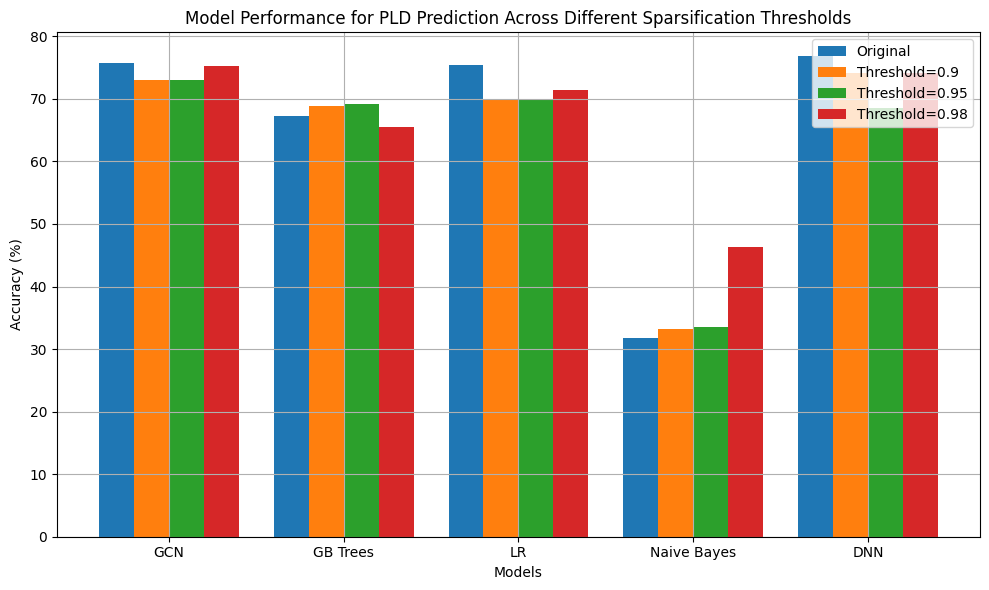

In [ ]:
import matplotlib.pyplot as plt

# Data for plotting
models = ['GCN', 'GB Trees', 'LR', 'Naive Bayes', 'DNN']
original = [75.7, 67.2, 75.4, 31.8, 76.8]
threshold_09 = [73.0, 68.8, 69.9, 33.2, 74.1]
threshold_095 = [73.0, 69.2, 69.9, 33.5, 68.6]
threshold_098 = [75.2, 65.5, 71.4, 46.3, 74.2]

# Creating plot
fig, ax = plt.subplots(figsize=(10, 6))
x = range(len(models))  # the label locations
width = 0.2  # the width of the bars

# Plotting data
rects1 = ax.bar(x, original, width, label='Original')
rects2 = ax.bar([p + width for p in x], threshold_09, width, label='Threshold=0.9')
rects3 = ax.bar([p + width*2 for p in x], threshold_095, width, label='Threshold=0.95')
rects4 = ax.bar([p + width*3 for p in x], threshold_098, width, label='Threshold=0.98')

# Adding labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy (%)')
ax.set_title('Model Performance for PLD Prediction Across Different Sparsification Thresholds')
ax.set_xticks([p + width*1.5 for p in x])
ax.set_xticklabels(models)
ax.legend()

# Adding a grid for better readability
ax.grid(True)
plt.tight_layout()

# Show plot
plt.show()


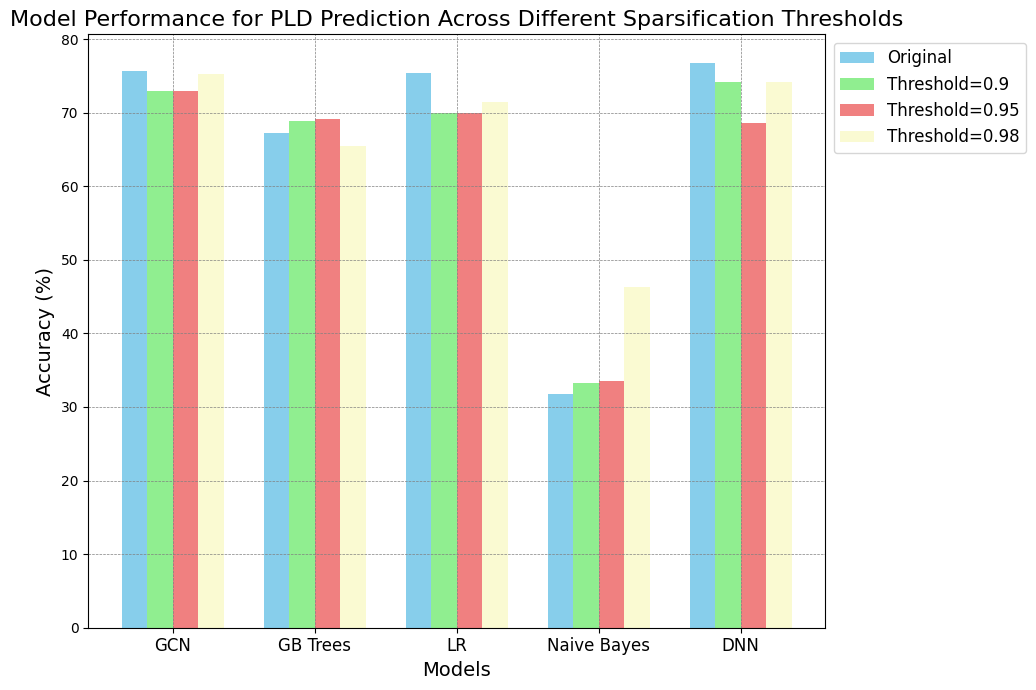

In [ ]:
import matplotlib.pyplot as plt

# Data for plotting
models = ['GCN', 'GB Trees', 'LR', 'Naive Bayes', 'DNN']
original = [75.7, 67.2, 75.4, 31.8, 76.8]
threshold_09 = [73.0, 68.8, 69.9, 33.2, 74.1]
threshold_095 = [73.0, 69.2, 69.9, 33.5, 68.6]
threshold_098 = [75.2, 65.5, 71.4, 46.3, 74.2]

# Creating plot
fig, ax = plt.subplots(figsize=(12, 7))
x = range(len(models))  # the label locations
width = 0.18  # the width of the bars

# Plotting data with color gradient
rects1 = ax.bar(x, original, width, label='Original', color='skyblue')
rects2 = ax.bar([p + width for p in x], threshold_09, width, label='Threshold=0.9', color='lightgreen')
rects3 = ax.bar([p + width*2 for p in x], threshold_095, width, label='Threshold=0.95', color='lightcoral')
rects4 = ax.bar([p + width*3 for p in x], threshold_098, width, label='Threshold=0.98', color='lightgoldenrodyellow')

# Adding labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Models', fontsize=14)
ax.set_ylabel('Accuracy (%)', fontsize=14)
ax.set_title('Model Performance for PLD Prediction Across Different Sparsification Thresholds', fontsize=16)
ax.set_xticks([p + width*1.5 for p in x])
ax.set_xticklabels(models, fontsize=12)

# Moving the legend outside the plot
ax.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=12)

# Adding a grid for better readability
ax.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')

# Adjusting the layout to accommodate the legend
plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust right side to make room for legend

# Show plot
plt.show()
